In [1]:
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.metrics import confusion_matrix,roc_curve, classification_report
from sklearn.metrics import roc_auc_score
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import sys
!{sys.executable} -m pip install pandas-profiling
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix,RocCurveDisplay, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


import time

C:\Users\sashi saravan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sashi saravan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\sashi saravan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
'C:\Users\sashi' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
Orginal_data = pd.read_csv("D:/Main Project New/GenderDiabetes.csv" , sep = "," , encoding = 'utf-8')

data = pd.read_csv("D:/Main Project New/GenderDiabetes.csv" , sep = "," , encoding = 'utf-8')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15768 entries, 0 to 15767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    15768 non-null  object 
 1   Pregnancies               15768 non-null  int64  
 2   Glucose                   15768 non-null  int64  
 3   BloodPressure             15768 non-null  int64  
 4   SkinThickness             15768 non-null  int64  
 5   Insulin                   15768 non-null  int64  
 6   BMI                       15768 non-null  float64
 7   DiabetesPedigreeFunction  15768 non-null  float64
 8   Age                       15768 non-null  int64  
 9   Outcome                   15768 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.2+ MB


In [4]:
data.isnull().sum()

Gender                      0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Gender                                     2
Pregnancies                                4
Glucose                                  157
BloodPressure                             92
SkinThickness                             73
Insulin                                  679
BMI                                      381
DiabetesPedigreeFunction                1519
Age                                       58
Outcome                                    2

In [6]:
#Function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

v_counts(data)

Female    11148
Male       4620
Name: Gender, dtype: int64
_____________________________________________________________________________
1    4714
0    4678
3    3197
2    3179
Name: Pregnancies, dtype: int64
_____________________________________________________________________________
97     272
96     248
118    215
95     212
107    210
      ... 
194      3
193      2
195      2
198      1
199      1
Name: Glucose, Length: 157, dtype: int64
_____________________________________________________________________________
78     451
81     445
80     441
86     421
84     417
      ... 
29       6
33       5
112      5
117      3
122      1
Name: BloodPressure, Length: 92, dtype: int64
_____________________________________________________________________________
11    663
9     593
10    577
45    527
34    525
     ... 
93      1
60      1
99      1
63      1
66      1
Name: SkinThickness, Length: 73, dtype: int64
________________________________________________________________________

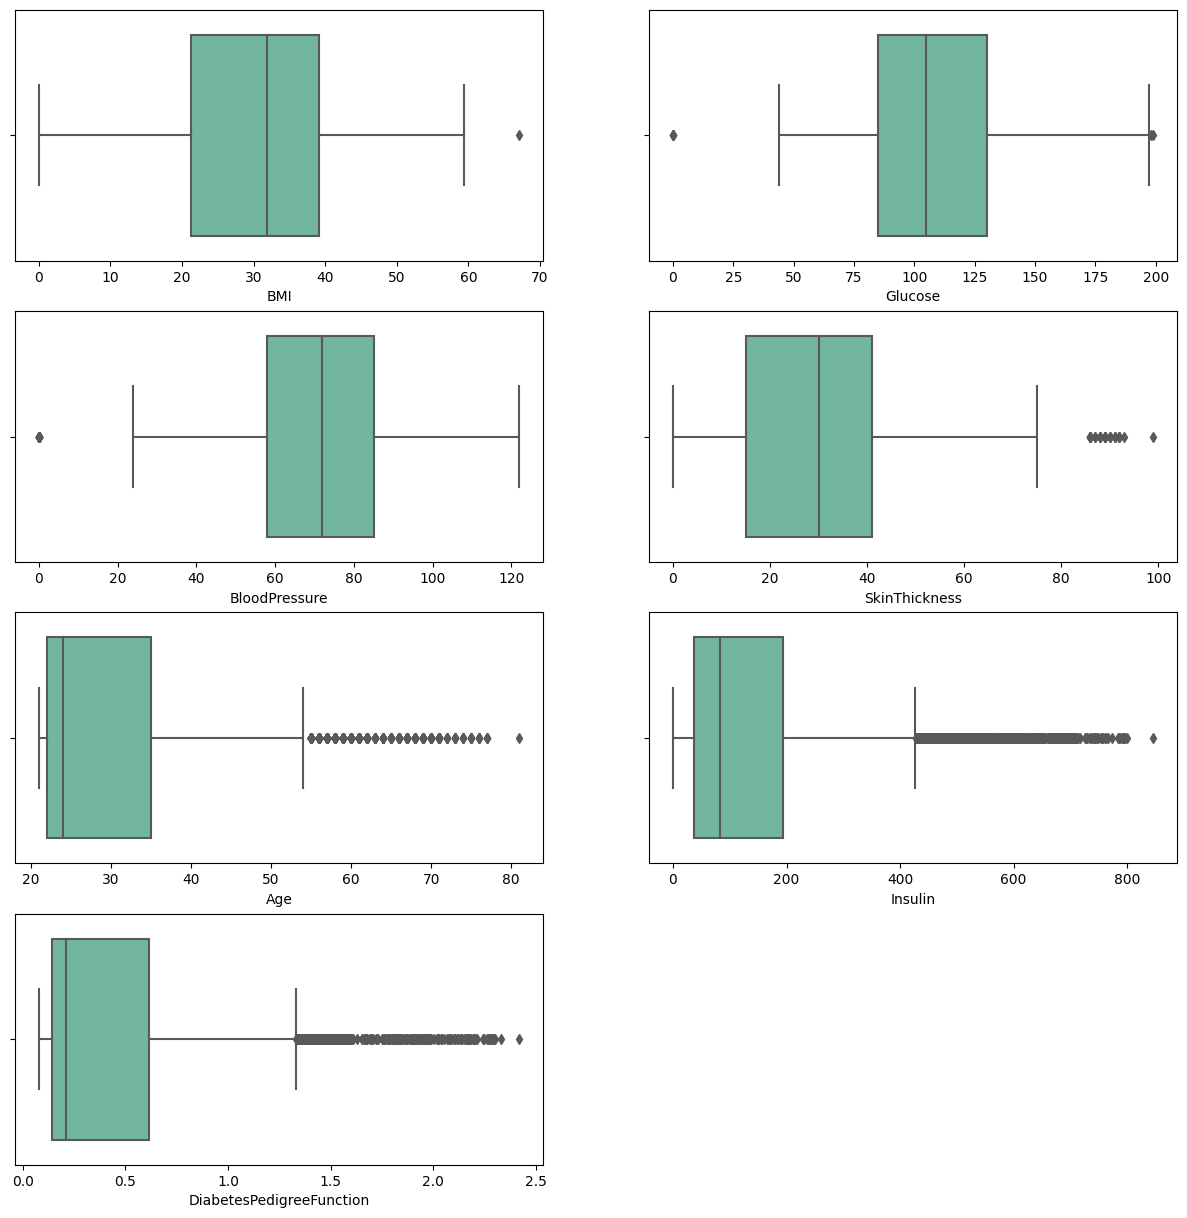

In [7]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age','Insulin', 'DiabetesPedigreeFunction']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data ,palette='Set2')
plt.show()

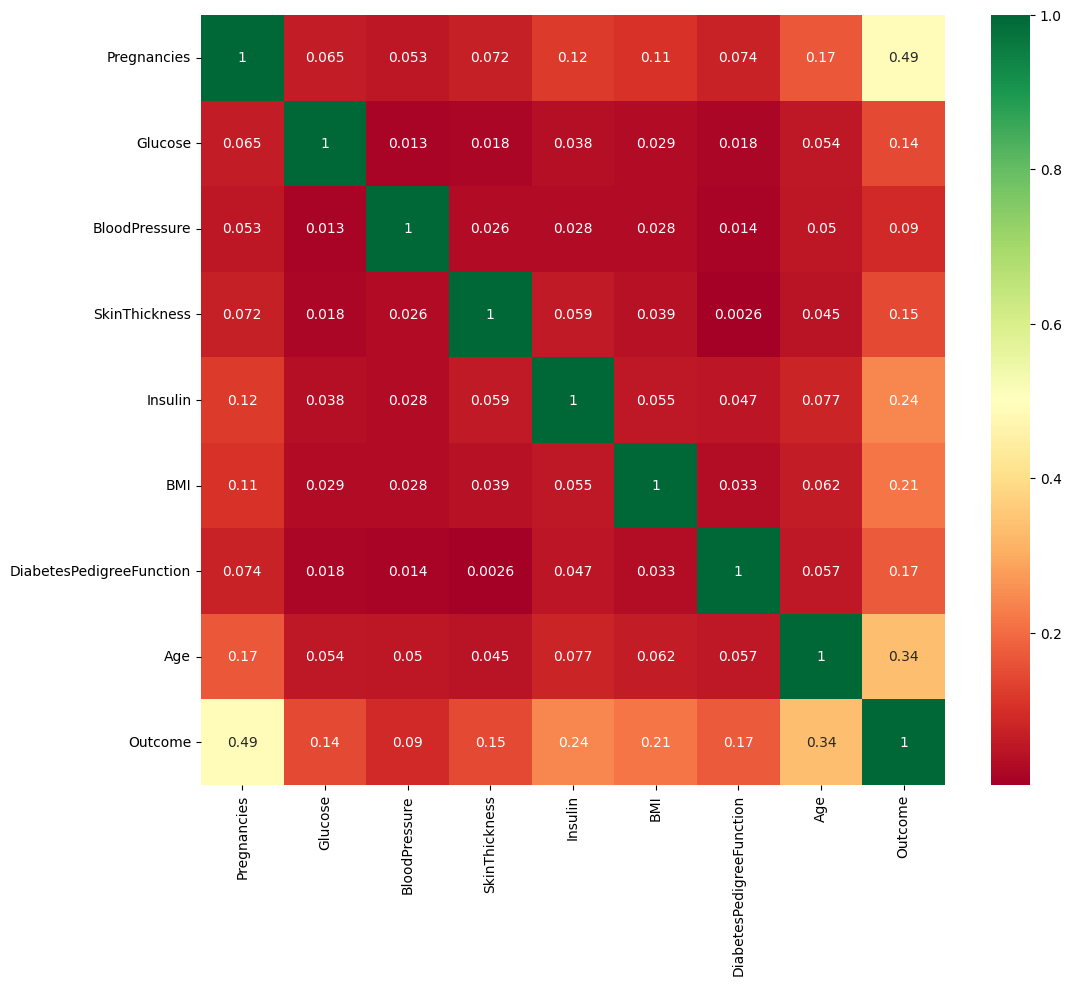

In [8]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

In [9]:
data.duplicated().sum()

0

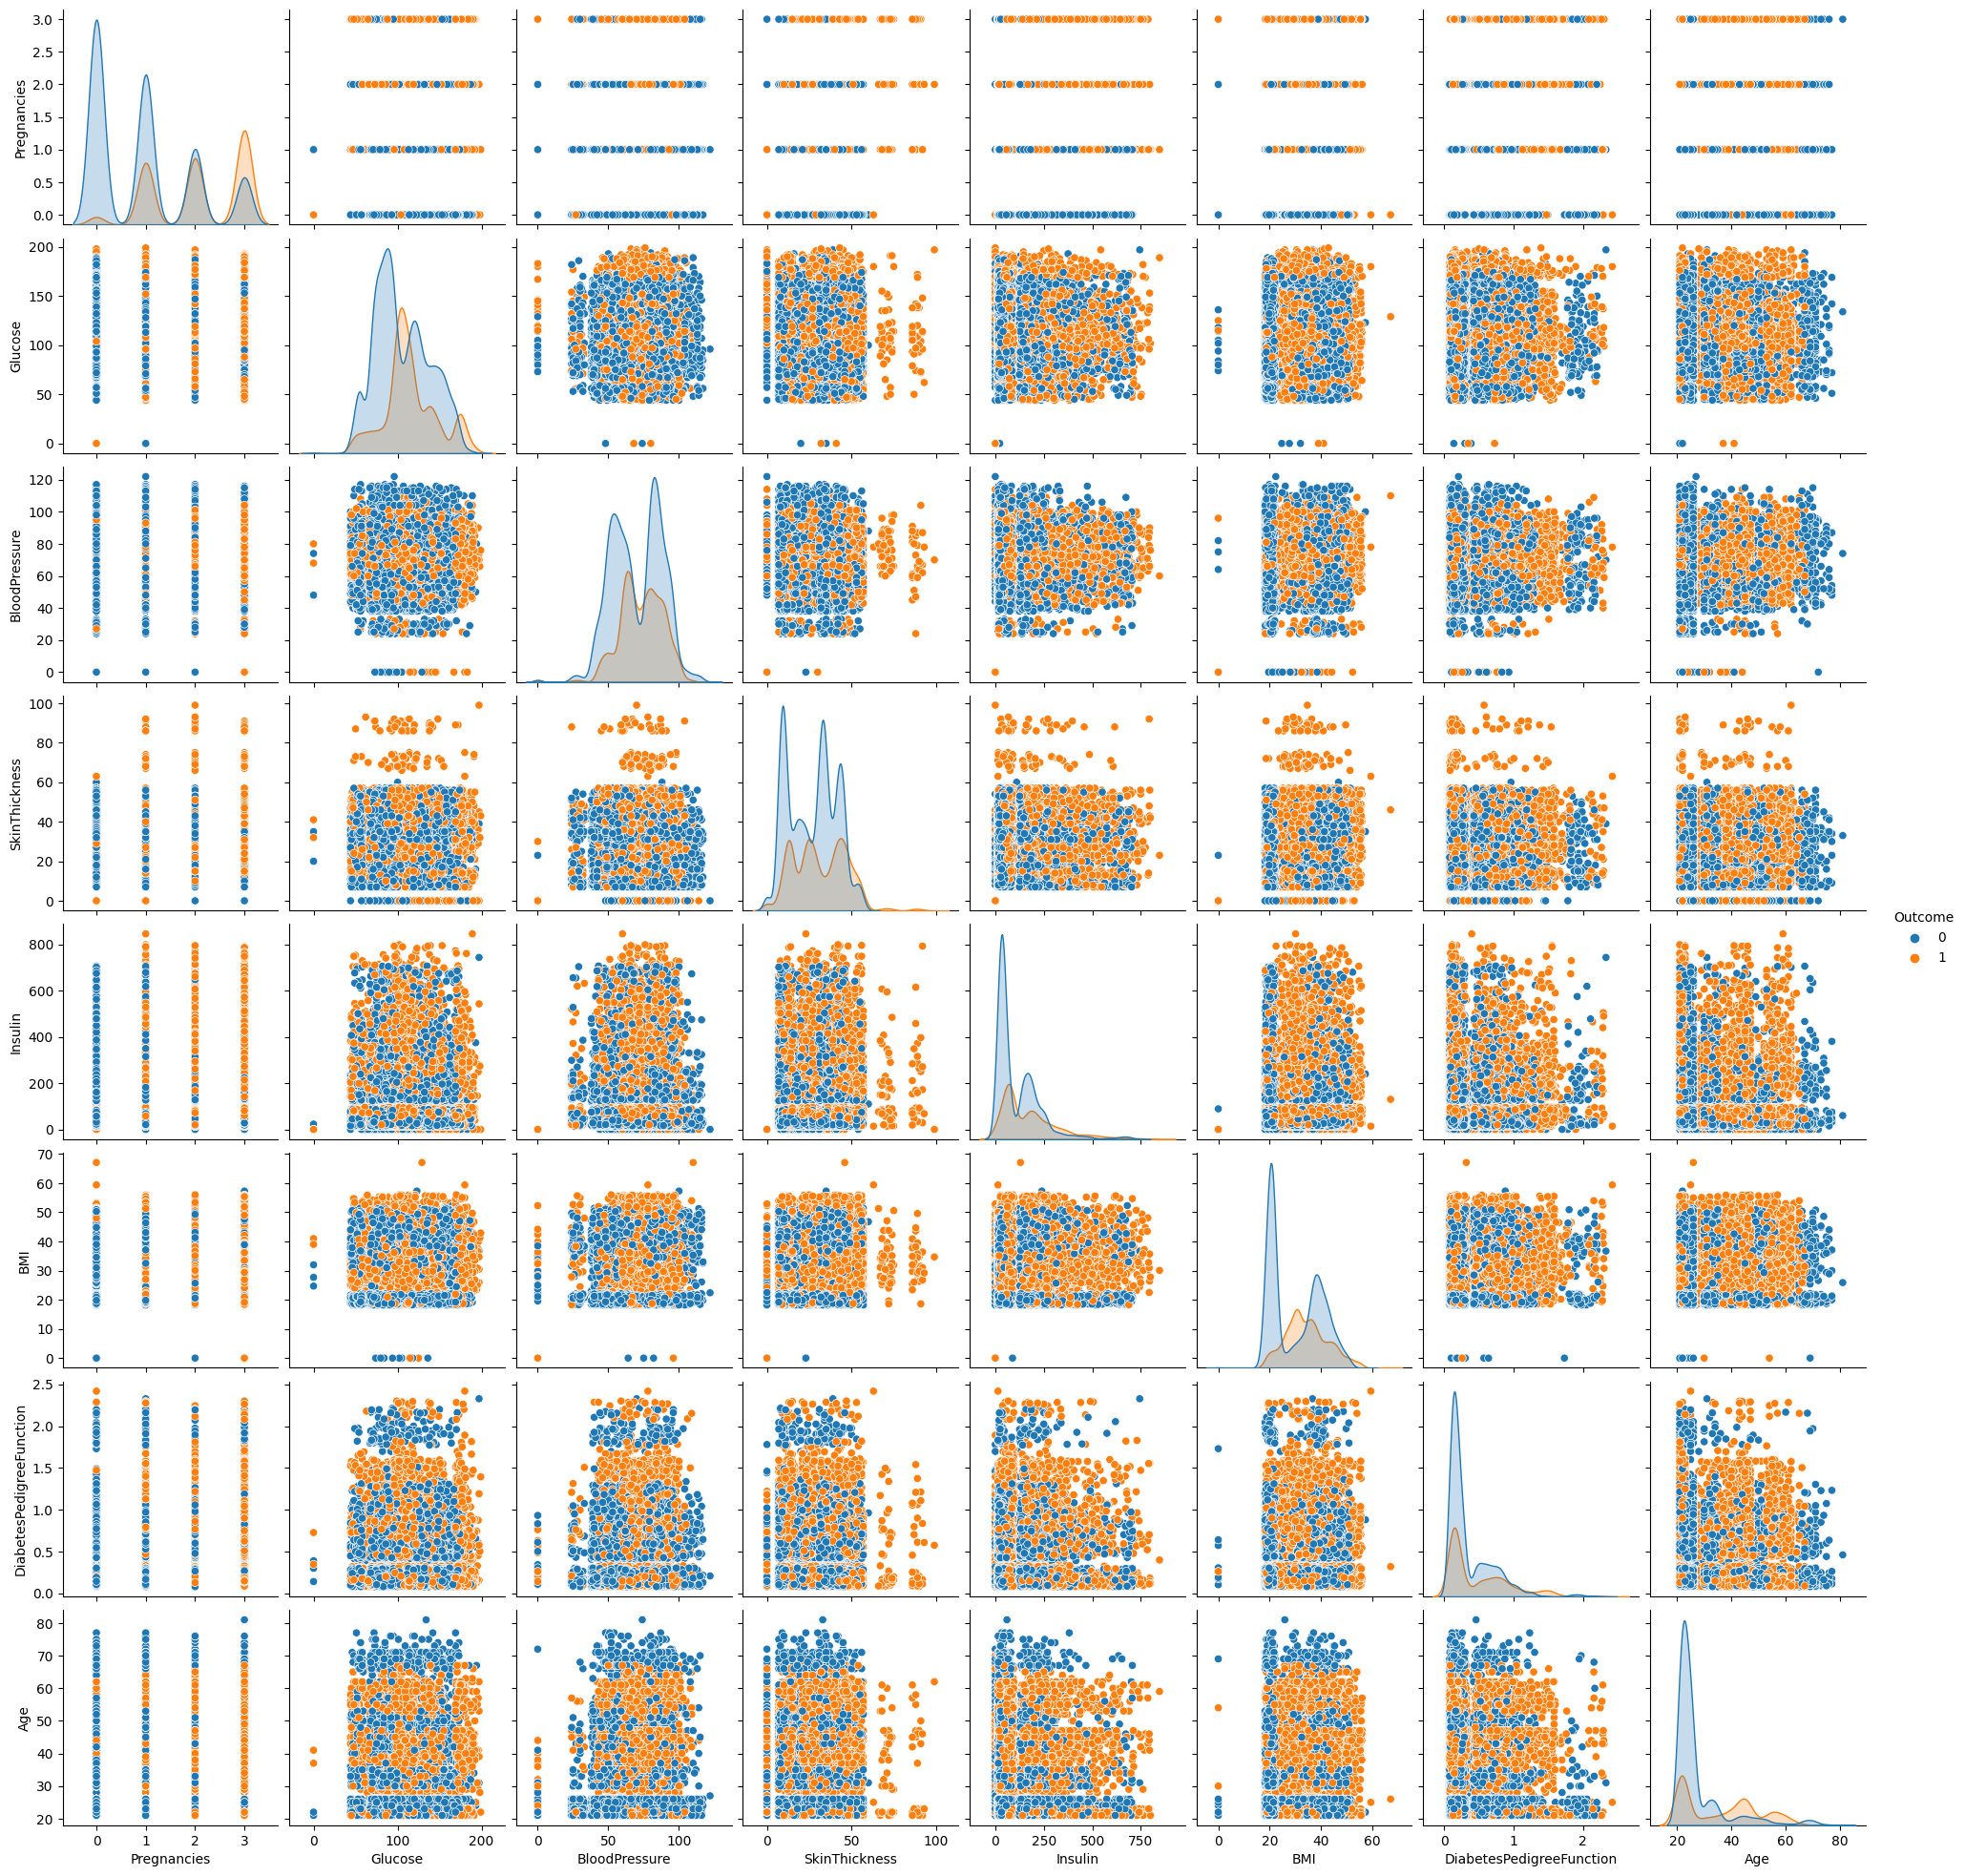

In [10]:
sns.pairplot(data,hue='Outcome')

In [11]:
data.drop_duplicates(inplace = True)
print(data.duplicated().sum())

print(data.shape)

0
(15768, 10)


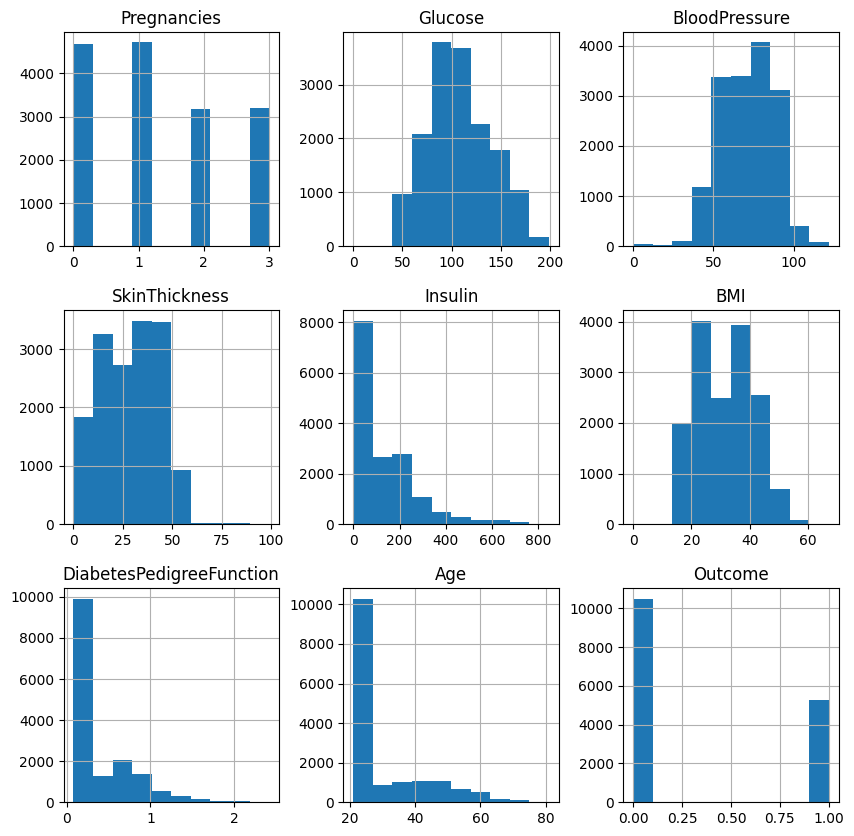

In [12]:
#histogram
data.hist(bins=10,figsize=(10,10))
plt.show()

In [13]:
data2 = data.copy() 

cols = ['BMI', 'Glucose', 'BloodPressure', 'SkinThickness', 'Age','Insulin', 'DiabetesPedigreeFunction','Pregnancies']

In [14]:
def data_clean(df=None):
        data["Gender"]=data["Gender"].replace({"Male":0,"Female":1}).astype(int)
        return data
    
    
diabetes_df_clean=data_clean(data)
diabetes_df_clean.head()

Gender  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0       0            0      148             72             35        0  33.6   
1       1            1       85             66             29        0  26.6   
2       0            0      183             64              0        0  23.3   
3       1            1       89             66             23       94  28.1   
4       0            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

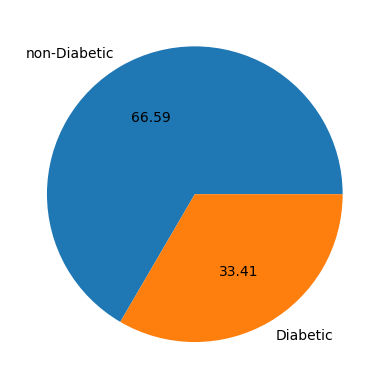

In [15]:
labels=["non-Diabetic","Diabetic"]

plt.pie(data2["Outcome"].value_counts() , labels =labels ,autopct='%.02f' );

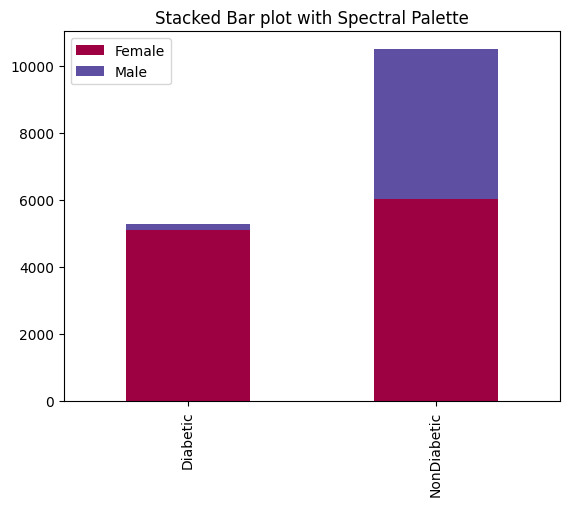

In [16]:
# Stacked barplot with pandas with differnt palette
Diabetic = Orginal_data.loc[Orginal_data['Outcome']==1, :]['Gender'].value_counts()
NonDiabetic = Orginal_data.loc[Orginal_data['Outcome']==0, :]['Gender'].value_counts()
data_plot  = pd.DataFrame([Diabetic,NonDiabetic])
data_plot.index=['Diabetic','NonDiabetic']

# Bar plot
data_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Stacked Bar plot with Spectral Palette');

In [17]:
def distribution_plots():
    plt.figure(figsize=(30,20))
    i = 1
    for c in data.columns:
        if(c != 'Outcome'):
            plt.subplot(3,6, i)
            i=i+1
            plt.title(c)
            sns.boxplot(data=data, y=c, x='Outcome')
            plt.subplot(3,6, i)
            i=i+1
            plt.title(c)
            sns.violinplot(data=data, y=c, x='Outcome')
            plt.plot()

In [18]:
data.corr()

Gender  Pregnancies   Glucose  BloodPressure  \
Gender                    1.000000     0.765989  0.047201       0.042699   
Pregnancies               0.765989     1.000000  0.064573       0.053188   
Glucose                   0.047201     0.064573  1.000000       0.012889   
BloodPressure             0.042699     0.053188  0.012889       1.000000   
SkinThickness             0.065009     0.071713  0.017806       0.026116   
Insulin                   0.110881     0.120842  0.037548       0.028235   
BMI                       0.088284     0.106447  0.029373       0.027600   
DiabetesPedigreeFunction  0.069356     0.073997  0.018142       0.014270   
Age                       0.127415     0.166735  0.054070       0.050474   
Outcome                   0.409604     0.491226  0.144720       0.089558   

                          SkinThickness   Insulin       BMI  \
Gender                         0.065009  0.110881  0.088284   
Pregnancies                    0.071713  0.120842  0.106447   
Glucose                        0.017806  0.037548  0.029373   
BloodPressure                  0.026116  0.028235  0.027600   
SkinThickness                  1.000000  0.059279  0.038989   
Insulin                        0.059279  1.000000  0.055032   
BMI                            0.038989  0.055032  1.000000   
DiabetesPedigreeFunction       0.002587  0.047316  0.033218   
Age                            0.045156  0.076920  0.062323   
Outcome                        0.146355  0.240494  0.213642   

                          DiabetesPedigreeFunction       Age   Outcome  
Gender                                    0.069356  0.127415  0.409604  
Pregnancies                               0.073997  0.166735  0.491226  
Glucose                                   0.018142  0.054070  0.144720  
BloodPressure                             0.014270  0.050474  0.089558  
SkinThickness                             0.002587  0.045156  0.146355  
Insulin                                   0.047316  0.076920  0.240494  
BMI                                       0.033218  0.062323  0.213642  
DiabetesPedigreeFunction                  1.000000  0.056874  0.170526  
Age                                       0.056874  1.000000  0.337468  
Outcome                                   0.170526  0.337468  1.000000

In [19]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),), columns=['Gender','Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

Gender  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0 -1.553379    -1.189871  1.230691       0.052212       0.447210 -1.016465   
1  0.643758    -0.281877 -0.731780      -0.302830       0.039987 -1.016465   
2 -1.553379    -1.189871  2.320952      -0.421178      -1.928257 -1.016465   
3  0.643758    -0.281877 -0.607178      -0.302830      -0.367236 -0.308833   
4 -1.553379    -1.189871  0.888037      -1.841350       0.447210  0.248239   

        BMI  DiabetesPedigreeFunction       Age  
0  0.213625                  0.596851  1.630153  
1 -0.509815                 -0.136975  0.058811  
2 -0.850866                  0.716497  0.141514  
3 -0.354792                 -0.626192 -0.768210  
4  1.195437                  5.013099  0.224216

In [20]:
X = Orginal_data.iloc[:, :-1].values
Y = Orginal_data.iloc[:, 9].values

In [21]:
X=data.drop("Outcome",axis=1)
y=data["Outcome"]

In [22]:
y.value_counts()

0    10500
1     5268
Name: Outcome, dtype: int64

In [23]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,y)

print(y_sm.shape , x_sm.shape)

(10536,) (10536, 9)


In [24]:
y_sm.value_counts()

0    5268
1    5268
Name: Outcome, dtype: int64

In [25]:
X_train , X_test , y_train , y_test = train_test_split(x_sm,y_sm, test_size=0.2 , random_state=42)

   Max Iterations  Accuracy  F1 Score  Precision  Recall     AUC  \
0              50    0.7328    0.5775     0.6229  0.5383  0.6855   
1             100    0.7844    0.6611     0.7082  0.6199  0.7444   
2             150    0.8102    0.7040     0.7474  0.6654  0.7750   
3             200    0.8106    0.7060     0.7457  0.6704  0.7765   
4             250    0.8106    0.7060     0.7457  0.6704  0.7765   

   Mean Squared Error  Computational Time  Error Rate       Support  \
0              0.2672              0.1459      0.2672  [3126, 1605]   
1              0.2156              0.2905      0.2156  [3126, 1605]   
2              0.1898              0.4031      0.1898  [3126, 1605]   
3              0.1894              0.4971      0.1894  [3126, 1605]   
4              0.1894              0.5648      0.1894  [3126, 1605]   

   Sensitivity   Specificity            Confusion Matrix  \
0        0.5383       0.8327   [[2603, 523], [741, 864]]   
1        0.6199       0.8688   [[2716, 410],

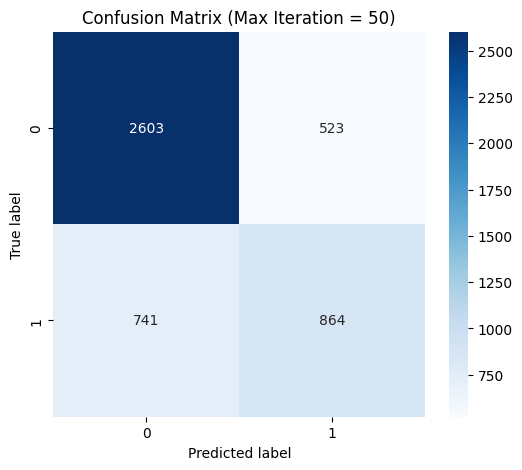

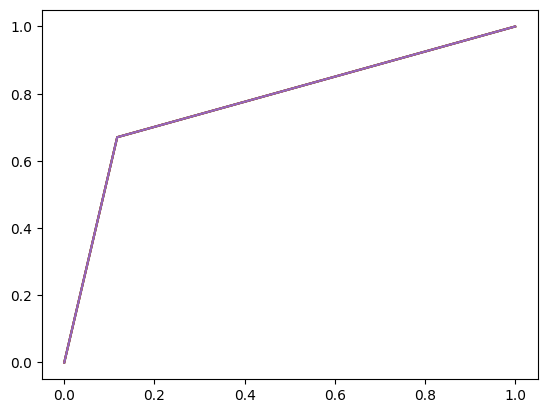

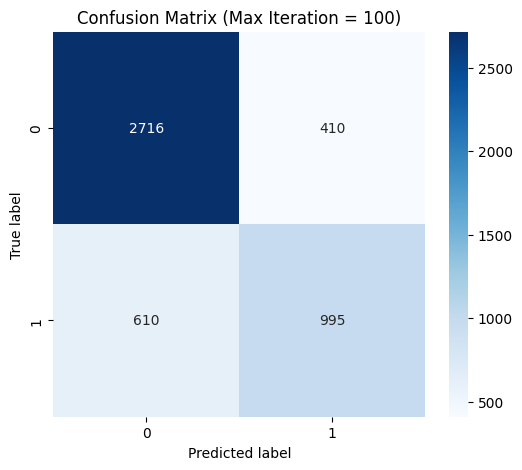

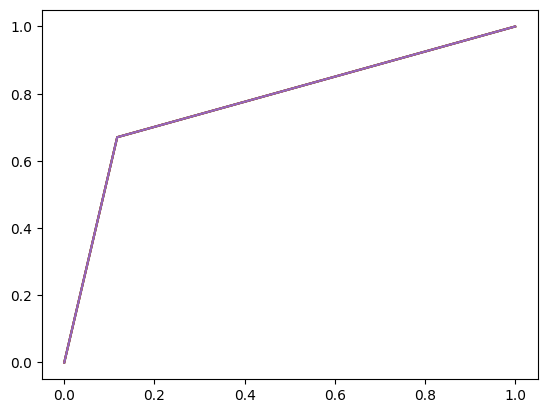

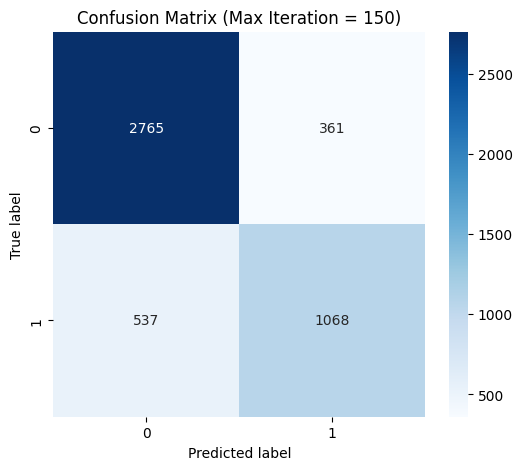

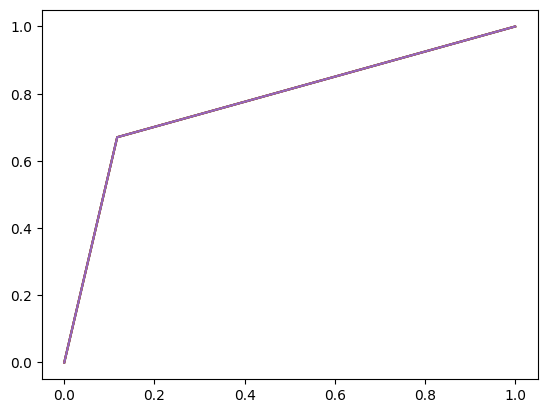

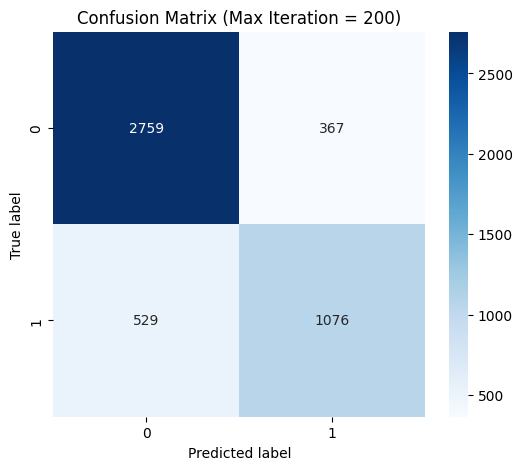

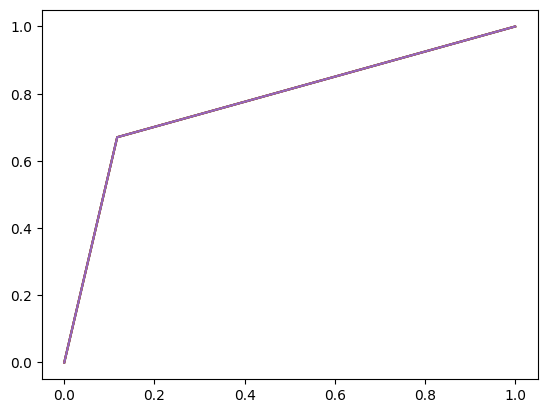

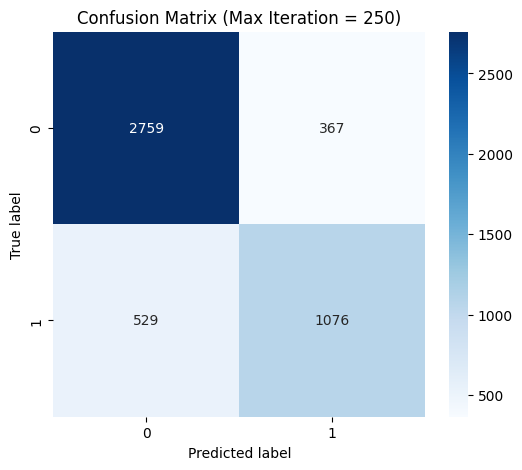

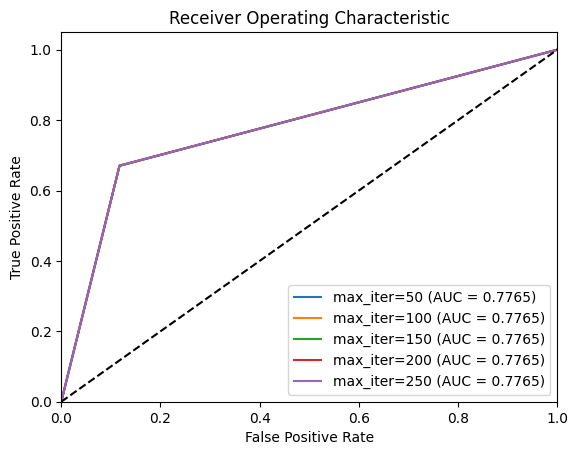

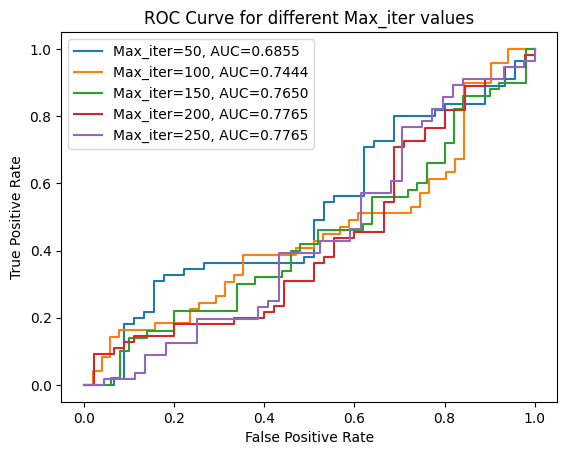

In [26]:
#Logistic Regression

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define max_iterations
max_iterations = [50,100,150,200,250]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
support_scores=[]
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for max_iter in max_iterations:
    # Fit logistic regression model
    start_time = time.time()
    lr_model = LogisticRegression(max_iter=max_iter).fit(X_train, y_train)
    end_time = time.time()

    # Make predictions on test set
    y_pred = lr_model.predict(X_test)
    
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]


    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    support = np.unique(y_test, return_counts=True)[1]
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

    
    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    support_scores.append(support)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Max Iterations': max_iterations,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Support':support_scores,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(max_iterations)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (Max Iteration = {max_iterations[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(max_iterations)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='max_iter={0} (AUC = {1})'.format(max_iterations[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#Logistic Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding var_smoothing values
auc_values = [0.6855, 0.7444, 0.7650, 0.7765,0.7765]
Max_iter_values = [50,100,150,200,250]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, Max_iter in zip(auc_values, Max_iter_values):
    # Generate some random binary classification data
    #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'Max_iter={Max_iter:}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different Max_iter values')

# Add a legend
ax.legend()

# Show the plot
plt.show()



In [30]:
import pickle
fileName="lr_model.pkl"
pickle.dump(lr_model,open(fileName,'wb'))

   Max Iterations  Accuracy  F1 Score  Precision  Recall     AUC  \
0             200    0.3166    0.4178     0.2938  0.7227  0.4154   
1             500    0.4394    0.4786     0.3496  0.7583  0.5170   
2             750    0.5756    0.5269     0.4236  0.6966  0.6050   
3            1000    0.6339    0.5611     0.4729  0.6897  0.6475   
4            1200    0.7301    0.6234     0.5918  0.6586  0.7127   

   Mean Squared Error  Computational Time  Error Rate       Support  \
0              0.6834              3.8311      0.6834  [3126, 1605]   
1              0.5606              9.4938      0.5606  [3126, 1605]   
2              0.4244             15.0451      0.4244  [3126, 1605]   
3              0.3661             19.1427      0.3661  [3126, 1605]   
4              0.2699             23.2868      0.2699  [3126, 1605]   

   Sensitivity   Specificity             Confusion Matrix  \
0        0.6704       0.8826   [[338, 2788], [445, 1160]]   
1        0.7227       0.1081   [[862, 2264

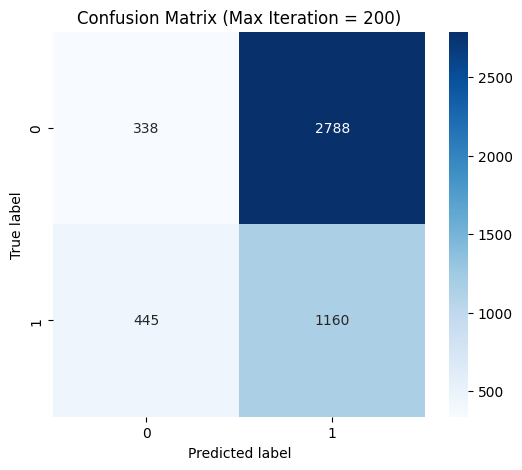

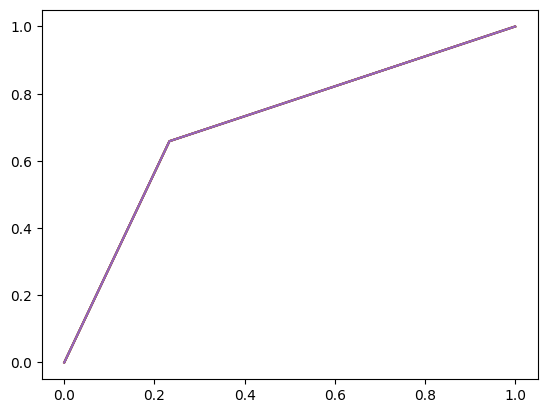

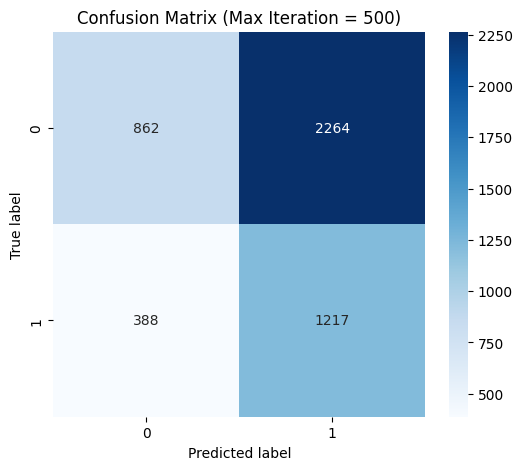

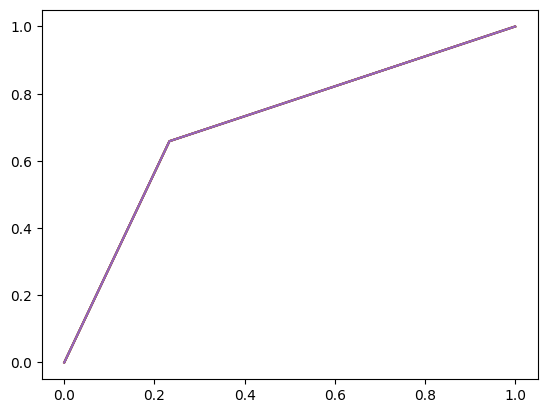

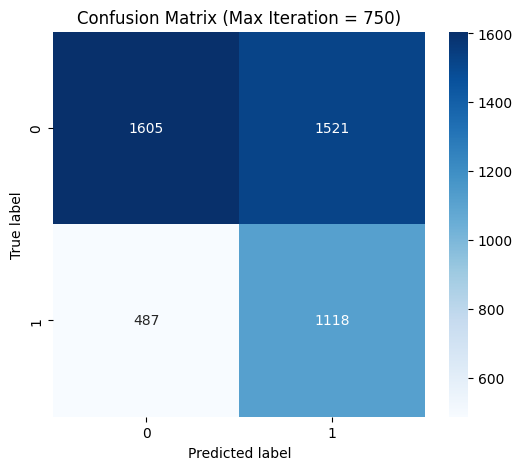

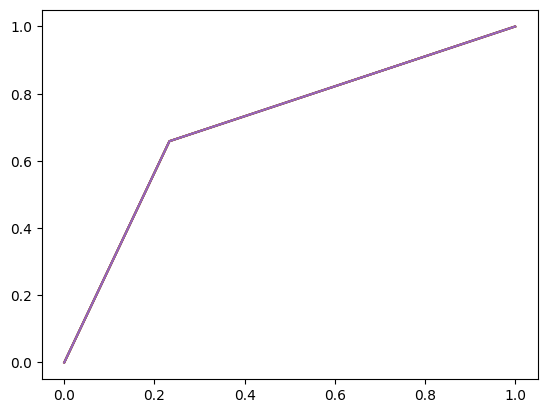

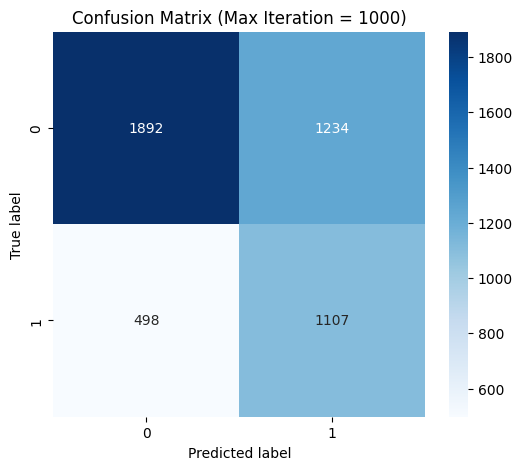

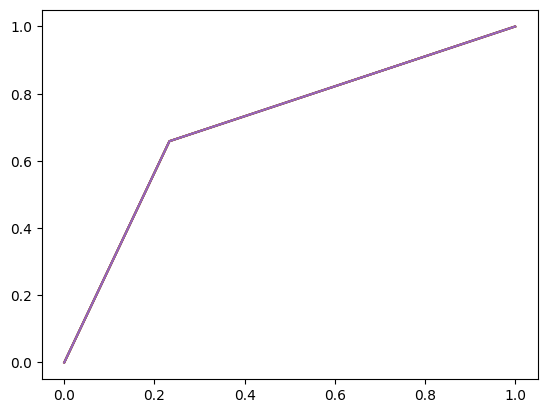

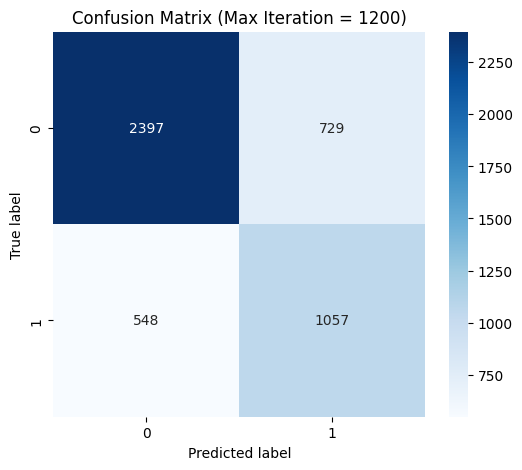

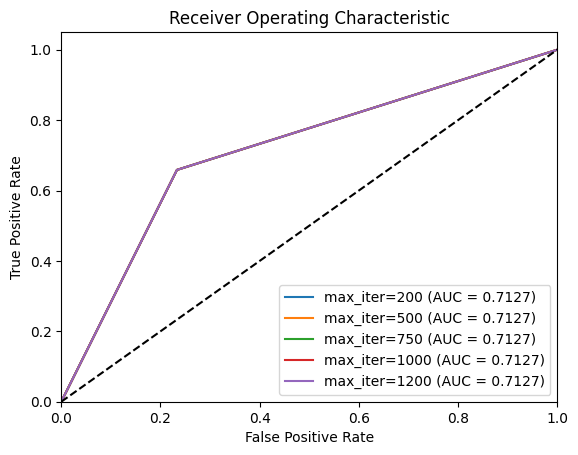

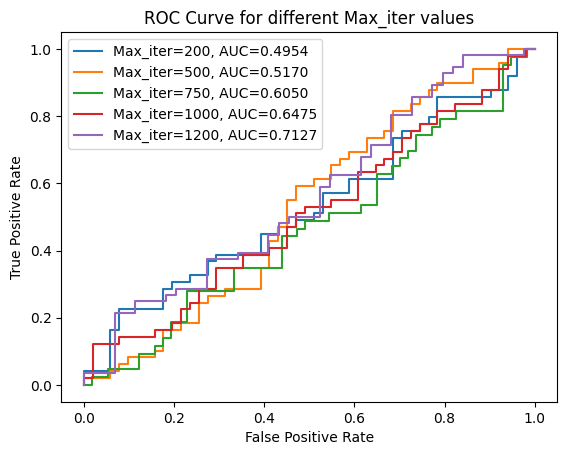

In [27]:
# SVM 

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define max_iterations
max_iterations = [200, 500, 750, 1000, 1200]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
support_scores=[]
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for max_iter in max_iterations:
    # Fit logistic regression model
    start_time = time.time()
    svm = SVC(kernel='rbf', max_iter=max_iter, probability=True,C=0.1)
    svm.fit(X_train, y_train)
    end_time = time.time()

    # Make predictions on test set
    y_pred = svm.predict(X_test)

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    support = np.unique(y_test, return_counts=True)[1]
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]

    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    support_scores.append(support)
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Max Iterations': max_iterations,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Support':support_scores,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(max_iterations)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (Max Iteration = {max_iterations[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(max_iterations)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='max_iter={0} (AUC = {1})'.format(max_iterations[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding var_smoothing values
auc_values = [0.4954, 0.5170, 0.6050, 0.6475,0.7127]
Max_iter_values = [200,500,750,1000,1200]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, Max_iter in zip(auc_values, Max_iter_values):
    # Generate some random binary classification data
     #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'Max_iter={Max_iter:}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different Max_iter values')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
import pickle
fileName="SVM_model.pkl"
pickle.dump(svm,open(fileName,'wb'))

   Maximum depth  Accuracy  F1 Score  Precision  Recall     AUC  \
0              2    0.8632    0.7808     0.8559  0.7178  0.8278   
1              4    0.8662    0.7944     0.8297  0.7620  0.8408   
2              6    0.8905    0.8341     0.8583  0.8112  0.8712   
3              8    0.9047    0.8580     0.8675  0.8486  0.8910   

   Mean Squared Error  Computational Time  Error Rate  Sensitivity   \
0              0.1368              1.2893      0.1368        0.6586   
1              0.1338              1.9463      0.1338        0.7178   
2              0.1095              2.8867      0.1095        0.7620   
3              0.0953              3.6086      0.0953        0.8112   

   Specificity            Confusion Matrix  \
0       0.7668  [[2932, 194], [453, 1152]]   
1       0.9379  [[2875, 251], [382, 1223]]   
2       0.9197  [[2911, 215], [303, 1302]]   
3       0.9312  [[2918, 208], [243, 1362]]   

                                    ROC Curve  
0  [(0.0, 0.0), (0.0621, 0.71

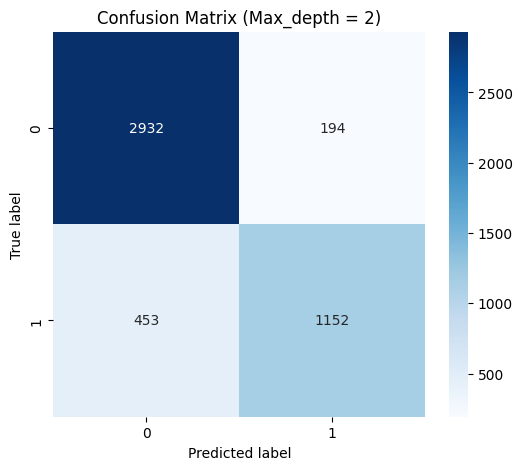

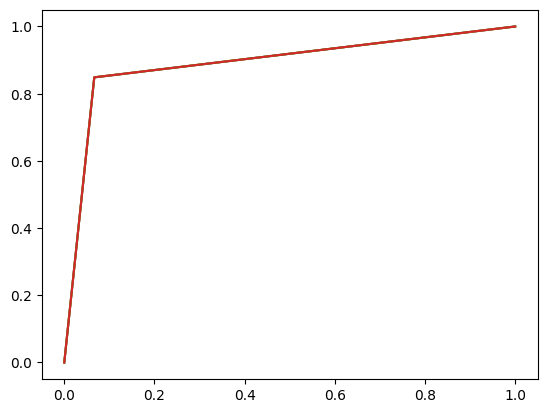

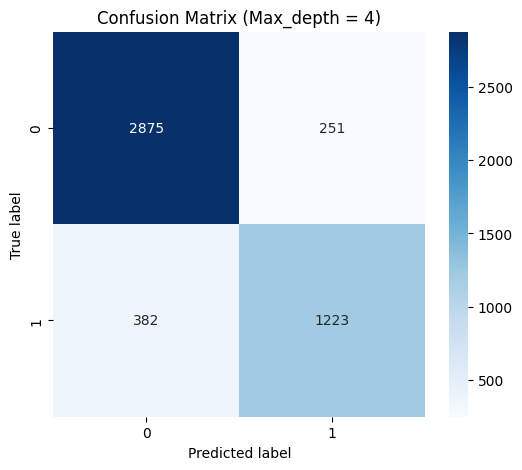

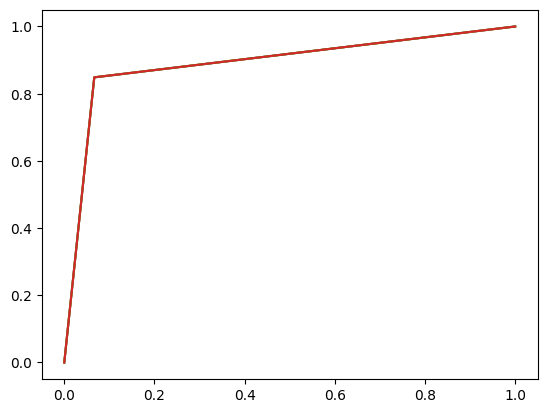

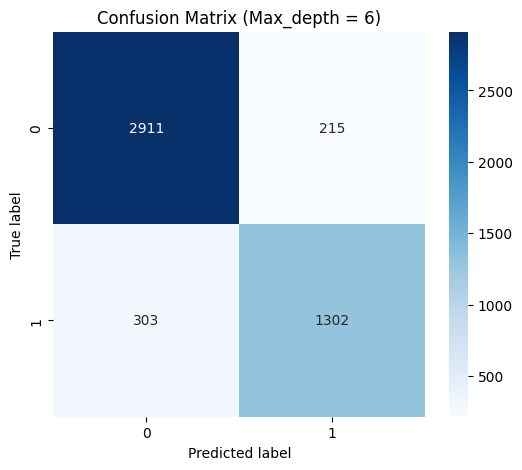

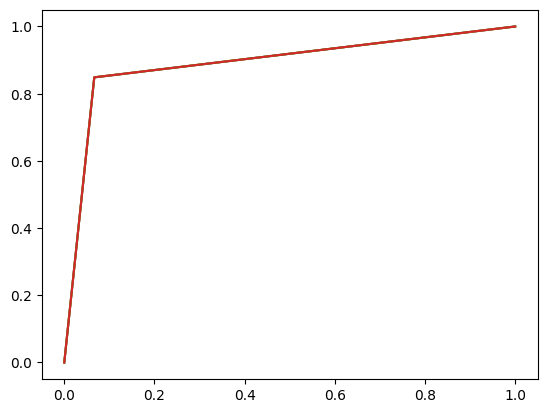

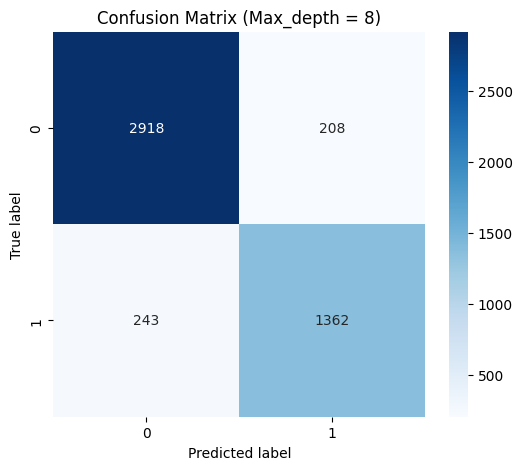

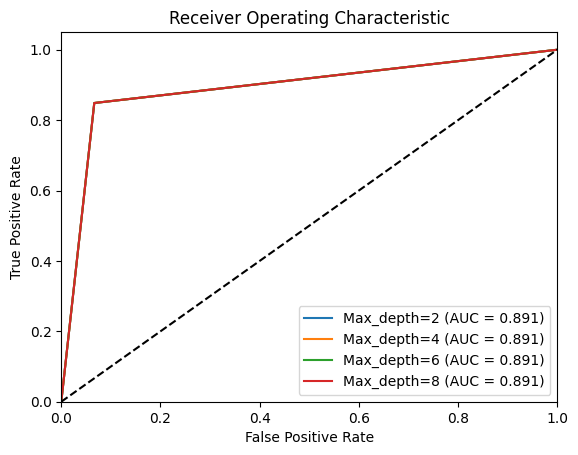

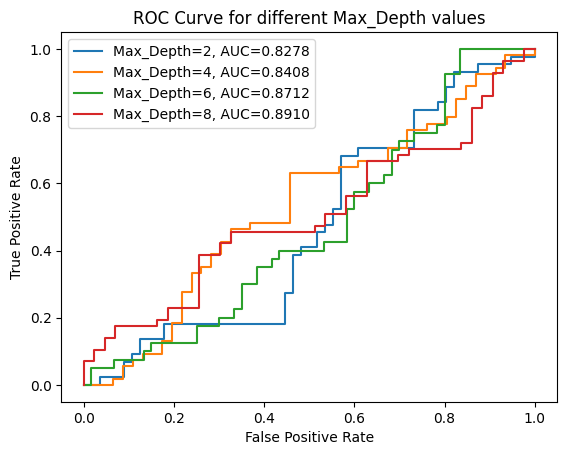

In [28]:
#Random forest  

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of max_depth values to try
maximum_depth = [2, 4, 6, 8]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for max_depth in maximum_depth:
    # Fit random forest classifier model
    start_time = time.time()
    rf = RandomForestClassifier(max_depth=max_depth ,n_estimators =100, random_state=42 )
    # fitting the model on the train data
    rf.fit(X_train, y_train)
    end_time = time.time()

    # make predictions on test set
    y_pred=rf.predict(X_test)

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]

    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'Maximum depth': maximum_depth,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(maximum_depth)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (Max_depth = {maximum_depth[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(maximum_depth)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='Max_depth={0} (AUC = {1})'.format(maximum_depth[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#trandom Forest

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding Max_depth values
auc_values = [0.8278, 0.8408, 0.8712, 0.8910]
Max_Depth_values = [2,4,6,8]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, Max_Depth in zip(auc_values, Max_Depth_values):
    # Generate some random binary classification data
     #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'Max_Depth={Max_Depth:}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different Max_Depth values')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
fileName="rf_model.pkl"
pickle.dump(rf,open(fileName,'wb'))

   var_smoothing  Accuracy  F1 Score  Precision  Recall     AUC  \
0   1.000000e-09    0.7945    0.7415     0.6469  0.8685  0.8125   
1   1.000000e-08    0.7943    0.7412     0.6467  0.8679  0.8122   
2   1.000000e-07    0.7954    0.7419     0.6485  0.8667  0.8127   
3   1.000000e-06    0.8053    0.7462     0.6690  0.8436  0.8146   

   Mean Squared Error  Computational Time  Error Rate  Sensitivity   \
0              0.2055               0.013      0.2055        0.8486   
1              0.2057               0.011      0.2057        0.8685   
2              0.2046               0.009      0.2046        0.8679   
3              0.1947               0.009      0.1947        0.8667   

   Specificity            Confusion Matrix  \
0       0.9335  [[2365, 761], [211, 1394]]   
1       0.7566  [[2365, 761], [212, 1393]]   
2       0.7566  [[2372, 754], [214, 1391]]   
3       0.7588  [[2456, 670], [251, 1354]]   

                                    ROC Curve  
0  [(0.0, 0.0), (0.2434, 0.86

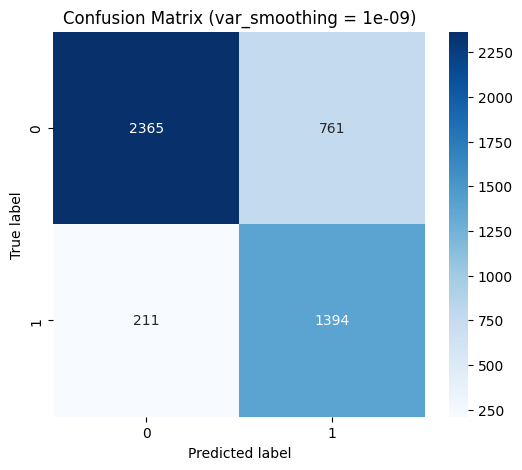

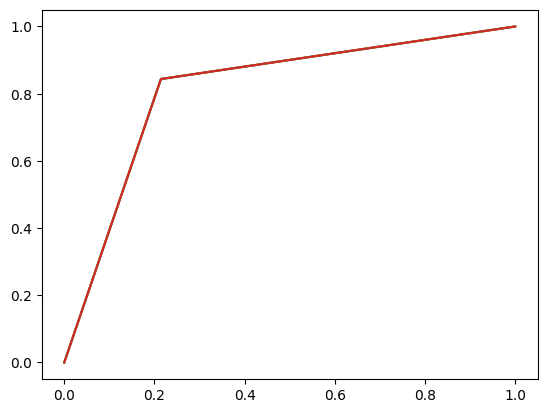

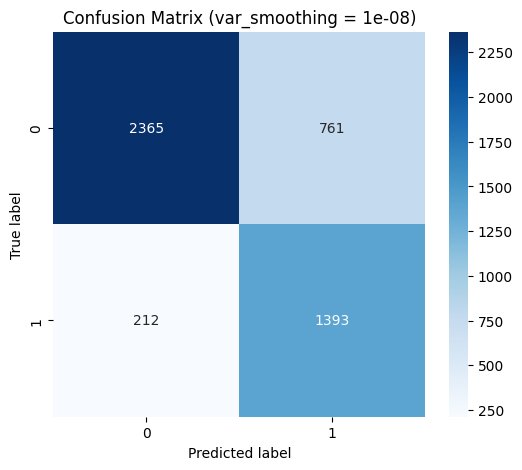

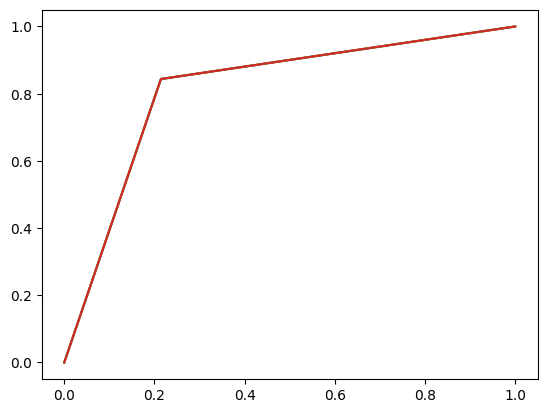

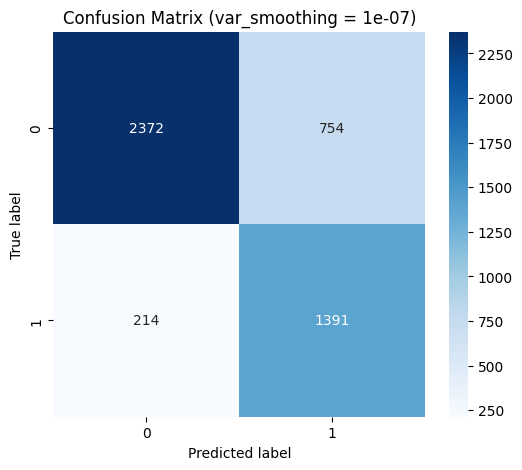

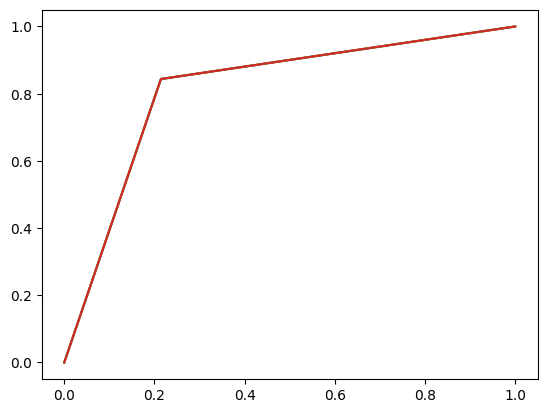

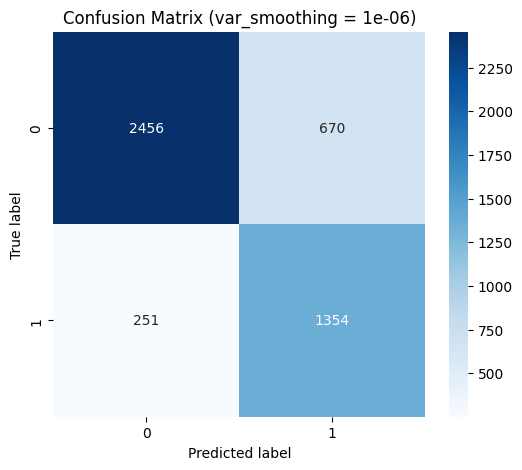

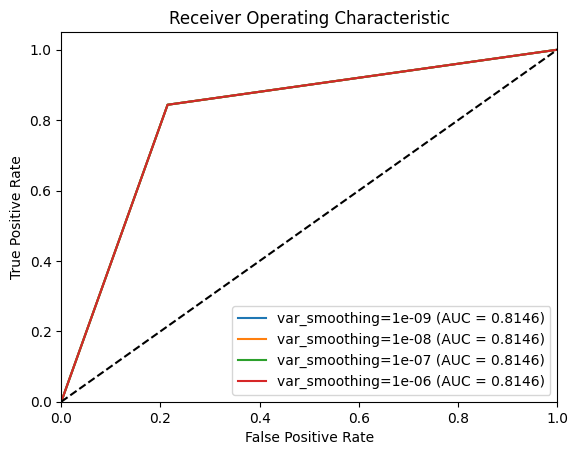

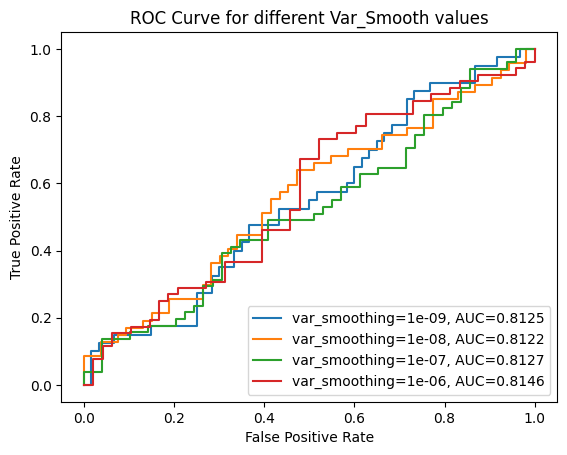

In [29]:
#Naive bayes  

import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, auc, mean_squared_error, roc_curve, confusion_matrix
import time

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define alpha values to test
var_smooth=[1e-9, 1e-8, 1e-7, 1e-6]

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
auc_scores = []
mse_scores = []
comp_times = []
error_rates = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []
roc_curves = []

# Loop through different max_iterations
for var_smoothing in var_smooth:
    # Initialize the classifier with the alpha value
    nb_clf = GaussianNB(var_smoothing=var_smoothing)
    
    # Fit the classifier on the training data
    start_time = time.time()
    nb_clf.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    
    # Evaluate the classifier on the test data
    y_pred = nb_clf.predict(X_test)

   # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    error_rate = 1 - accuracy
    comp_time = round(end_time - start_time, 4)
    specificity = round(tn / (tn+fp), 4)
    sensitivity = round(tp / (tp+fn), 4)

    # Calculate AUC and ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    roc_curve_values = [(round(fpr[i], 4), round(tpr[i], 4)) for i in range(len(fpr))]

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix = [[tn, fp], [fn, tp]]

    # Append results to lists
    accuracy_scores.append(round(accuracy, 4))
    f1_scores.append(round(f1, 4))
    precision_scores.append(round(precision, 4))
    recall_scores.append(round(recall, 4))
    auc_scores.append(round(auc_score, 4))
    mse_scores.append(round(mse, 4))
    comp_times.append(comp_time)
    error_rates.append(round(error_rate, 4))
    sensitivity_scores.append(sensitivity)
    specificity_scores.append(specificity)
    conf_matrices.append(conf_matrix)
    roc_curves.append(roc_curve_values)

# Create DataFrame with results
results_df = pd.DataFrame({
    'var_smoothing': var_smooth,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'AUC': auc_scores,
    'Mean Squared Error': mse_scores,
    'Computational Time': comp_times,
    'Error Rate': error_rates,
    'Sensitivity ':sensitivity_scores,
    'Specificity':specificity_scores,
    'Confusion Matrix': conf_matrices,
    'ROC Curve': roc_curves
})

# Display results DataFrame
print(results_df)

for i in range(len(var_smooth)):
    confusion_matrix = conf_matrices[i]
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Confusion Matrix (var_smoothing = {var_smooth[i]})")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()
    
    for i in range(len(var_smooth)):
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc = round(auc(fpr, tpr), 4)
        plt.plot(fpr, tpr, label='var_smoothing={0} (AUC = {1})'.format(var_smooth[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#Naive bayes

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define the AUC values and corresponding var_smoothing values
auc_values = [0.8125, 0.8122, 0.8127, 0.8146]
var_smoothing_values = [1e-09, 1e-08, 1e-07, 1e-06]

# Create a figure and axis objects
fig, ax = plt.subplots()

# Loop over the AUC and var_smoothing values to plot the ROC curves
for auc_val, var_smooth in zip(auc_values, var_smoothing_values):
    # Generate some random binary classification data
    #ax.plot([0, 1], [0, 1], 'r--')
    y_true = np.random.randint(0, 2, size=100)
    y_score = np.random.rand(100)
    
    # Calculate the false positive rate, true positive rate, and AUC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    ax.plot(fpr, tpr, label=f'var_smoothing={var_smooth:.0e}, AUC={auc_val:.4f}')
    
# Set the axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for different Var_Smooth values')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
fileName="NB_model.pkl"
pickle.dump(nb_clf,open(fileName,'wb'))